<a href="https://colab.research.google.com/github/EddyGiusepe/Perceptron_with_Python/blob/main/The_Perceptron_Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">O Perceptron: Métricas para Classificação Binâria</h2>



Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

# Nosso Dataset: MNIST

Este Dataset, [MNIST](http://yann.lecun.com/exdb/mnist/), foi elaborado com o objetivo de treinar modelos automáticos de OCR (Optical Character Recognition) para poder acelerar o trabalho de classificação de correio a partir do código postal escrito. Está formado por $70000$ imagens de dígitos manuscritos, entre $0$ e $9$, nosso objetivo é identificar (classificar) uma imagem (dizer que número é) diretamente a partir de seus pixeis. Para descarregar estes Dados vamos a utilizar [Scikit-Learn](https://scikit-learn.org/stable/).

In [7]:
# As nossas bibliotecas

from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

import random

In [2]:

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

X.shape, y.shape # 784 características

((70000, 784), (70000,))

Cada imagem está formada por $784$ características (os pixeis). Podemos visualizar umas quantas imagens com suas respectivas etiquetas (labels), para ter uma ideia do tipo de Dados que temos: 

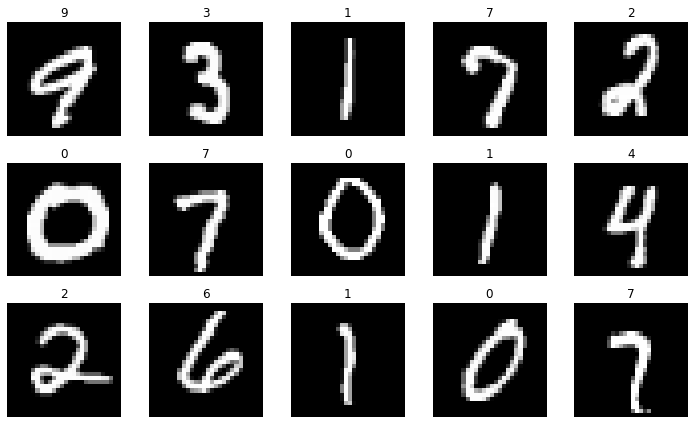

In [4]:
# Ver link: https://stackoverflow.com/questions/71270651/issue-reshaping-an-array-into-28-28-for-an-mnist-image


r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))

for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X)-1)
        img = X.loc[[ix]].to_numpy()
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.axis("off")
        plt.title(y[ix])
plt.tight_layout()
plt.show()

Vamos a extrair $60000$ imagens para treinar nosso modelo, $10000$ para avaliação e calcular as diferentes métricas que implementaremos depois.

In [5]:
X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., y[:60000], y[60000:]


​☀️​💡​ Lembra que para um melhor aprendizado de nosso modelo é necessário normalizar os Dados que usaremos como entradas. Neste caso cada pixel está representado por um valor inteiro entre $0 - 255$, pelo que ao dividir cada imagem por $255$ teremos nossos valores no intervalo entre $0 - 1$.

# Treinando um classificador Binârio

Para realizar esta task precisamos que nosso Dataset esteja dividido em dois classes, no entanto o Dataset MNIST, tem $10$ classes (dígitos entre $0$ e $9$). Neste caso vamos treinar um modelo para classificar as imagens com o número $5$ do resto.

In [8]:

y_train_5 = (y_train == '5').astype(np.int)

y_test_5 = (y_test == '5').astype(np.int)


Agora podemos usar o modelo de `Regressão Logística` que implementamos no script anterior. Neste caso trocamos o esquema de inicialização dos pesos, utilizando uma DISTRIBUIÇÃO NORMAL ESCALADA pelo número de pesos.Também adicionamos um print para ver como vai evolucionando o modelo durante o treinamento, visualizando o valor da LOSS FUNCTION em cada epoch.

In [16]:
def bce(y, y_hat):
    return - np.mean(y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat))

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

class Perceptron():
  def __init__(self, size):
    self.w = np.random.normal(loc=0.0, # Distribuição de probabilidade Normal
          scale = np.sqrt(2/(size+1)), # size --> Número de neurônios em nosso Perceptron
          size = (size, )) 
    self.ws = []
    self.activation = sigmoid
    self.loss = bce
    
  def __call__(self, w, x):
    return self.activation(np.dot(x, w)) 

  def fit(self, x, y, epochs, lr, verbose=True):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(1,epochs+1):
        # Batch Gradient Descent
        y_hat = self(self.w, x)  
        # Função de Perda
        l = self.loss(y, y_hat)
        # Derivadas
        dldh = (y_hat - y)
        dhdw = x
        dldw = np.dot(dldh, dhdw)
        # Atualizar Pesos
        self.w = self.w - lr*dldw
        # Salvar os pesos para a Animação
        self.ws.append(self.w.copy())
        # Print da LOSS
        if verbose:
            print(f"Epoch {epoch}/{epochs} Loss {l}")

In [17]:
np.random.seed(42) # Para que nos dei sempre o mesmo resultado

perceptron = Perceptron(X.shape[1] + 1)
epochs, lr = 20, 1e-5
perceptron.fit(X_train, y_train_5, epochs, lr)

Epoch 1/20 Loss -0.5548410142855105
Epoch 2/20 Loss 0.7206598224991427
Epoch 3/20 Loss 0.5304482677090414
Epoch 4/20 Loss 0.3387412138758039
Epoch 5/20 Loss 0.14817873671774645
Epoch 6/20 Loss 0.02999051884537082
Epoch 7/20 Loss 0.07018573941348852
Epoch 8/20 Loss 0.03957115693418076
Epoch 9/20 Loss 0.053798900444024085
Epoch 10/20 Loss 0.0419895655402817
Epoch 11/20 Loss 0.04634619050752581
Epoch 12/20 Loss 0.041700388831850364
Epoch 13/20 Loss 0.04249345232272722
Epoch 14/20 Loss 0.04051560447638476
Epoch 15/20 Loss 0.040218266715440924
Epoch 16/20 Loss 0.039198805829896884
Epoch 17/20 Loss 0.03867201099357209
Epoch 18/20 Loss 0.03801039413850561
Epoch 19/20 Loss 0.037502744090907016
Epoch 20/20 Loss 0.03700103180387198


Atá aqui já treinamos nosso modelo. Agora, como podemos avaliar nosso modelo? É um modelo bom ou ruim? se treinamos outro modelo, como podemos saber se é melhor o pior que o primeiro? 

Vamos responder estas perguntas com as `Métricas de Desempenho`.

# Métricas

Aqui estudaremos as métricas mais utilizadas na avaliação de modelos de classificação binâria.

In [20]:
def evaluate(perceptron, x, t = 0.5): # Threshold = 0.5 (Default)
    w = perceptron.ws[-1] # Extrai os últimos pesos do Perceptron (da última epoch)
    x = np.c_[np.ones(len(x)), x] # Adiciona uma coluna de "1" para fazer o produto escalar
    y = perceptron(w, x) 
    return (y > t).astype(np.int)

## Accuracy (ou precisão)

Nesta métrica simplesmente contabilizamos todos os elementos do Dataset que nosso modelo a sido capaz de CLASSIFICAR CORRETAMENTE e o dividimos pelo número total de elementos. Isto implica que a precisão será um valor entre $0$ e $1$, significando: $0$ que nosso modelo não acertou nenhum resultado e $1$ que acertou todos. Também é comum dar este valor em porcentagem. 

In [21]:
def accuracy(y_pred, y):
    return np.sum(y_pred == y) / len(y)
    

In [22]:
y_pred = evaluate(perceptron, X_train)

accuracy(y_pred, y_train_5)

0.9371

In [23]:
y_pred = evaluate(perceptron, X_test)

accuracy(y_pred, y_test_5)

0.9412

Como podemos observar nosso modelo tem uma precisão aprox. de $94\%$ tanto para o conjunto de treinamento como para o conjunto de teste (avaliação). <font color="yellow">Este é um bom modelo?</font> A priori poderíamos pensar que sim, já que nosso modelo acerta $9$ de cada $10$ imagens ... No entanto, a realidade é que nosso modelo não está fazendo praticamente nada. Vamos ver! ... Estamos contruíndo um modelo para classificação binâria para detectar o número $5$. Quantas imagens diferentes de $5$ temos em nosso Dataset?  

In [24]:
1 - y_train_5.mean(), 1 - y_test_5.mean()

(0.90965, 0.9108)

Aqui temos a resposta, nosso Dataset está formado num $91\%$ por imagens que não são $5$. Isto significa que um modelo naive que sempre diga que NÃO temos um $5$ vai ter uma ACCURACY do $91\%$. No entanto, no mundo real, nunca detectaremos este dígito e nossa aplicação falhará drasticamente. Nosso modelo tem uma precisão do $94\%$, melhorando ligeiramente este valor porém não por muito.  

In [ ]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        fives = (y_test_5 == 1)
        ix = random.randint(0, len(X_test[fives])-1)
        img = (X_test[fives].loc[ix]).to_numpy()
        #img = X.loc[[ix]].to_numpy()
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.axis("off")
        y_pred = evaluate(perceptron, [img])
        plt.title(f"{y_test_5[fives][ix]} / {y_pred[0]}", color="red" if y_test_5[fives][ix] != y_pred[0] else "green")
plt.tight_layout()
plt.show()

In [ ]:
perceptron = Perceptron(X.shape[1] + 1)
epochs, lr = 300, 1e-5
perceptron.fit(X_train, y_train_5, epochs, lr, verbose=False)
y_pred = evaluate(perceptron, X_test)
accuracy(y_pred, y_test_5)

0.9693

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_5, y_pred)

0.9693

In [ ]:
TP = np.sum((y_pred == 1) & (y_test_5 == 1)) 
TN = np.sum((y_pred == 0) & (y_test_5 == 0)) 
FP = np.sum((y_pred == 1) & (y_test_5 == 0))
FN = np.sum((y_pred == 0) & (y_test_5 == 1))

CM = [[TN, FP],
      [FN, TP]]
CM

[[9038, 70], [237, 655]]

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_5, y_pred)

array([[9038,   70],
       [ 237,  655]])

In [ ]:
def evaluate2(perceptron, x):
    w = perceptron.ws[-1]
    x = np.c_[np.ones(len(x)), x]
    y = perceptron(w, x)
    return y

In [ ]:
from sklearn.metrics import roc_curve

y_pred2 = evaluate2(perceptron, X_test)
fpr, tpr, thresholds = roc_curve(y_test_5, y_pred2)

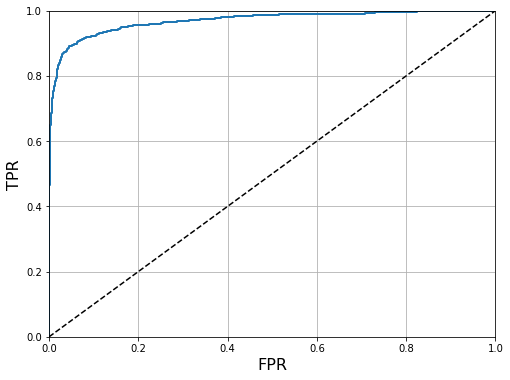

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('FPR', fontsize=16) 
    plt.ylabel('TPR', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)              
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_5, y_pred2)

0.9693789129351619